In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('futuristic_city_traffic.csv')

print(df.dtypes)
print(df.describe())

df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Feature scaling
scaler = StandardScaler()
features = df.drop(['Traffic Density'], axis=1)
target = df['Traffic Density']
scaled_features = scaler.fit_transform(features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

lgbm = LGBMRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
catboost = CatBoostRegressor(random_state=42, verbose=0)

# Train the models
lgbm.fit(X_train, y_train)
xgb.fit(X_train, y_train)
catboost.fit(X_train, y_train)

# Make predictions
predictions_lgbm = lgbm.predict(X_test)
predictions_xgb = xgb.predict(X_test)
predictions_catboost = catboost.predict(X_test)

# Evaluate the models
mae_lgbm = mean_absolute_error(y_test, predictions_lgbm)
mse_lgbm = mean_squared_error(y_test, predictions_lgbm)
r2_lgbm = r2_score(y_test, predictions_lgbm)

mae_xgb = mean_absolute_error(y_test, predictions_xgb)
mse_xgb = mean_squared_error(y_test, predictions_xgb)
r2_xgb = r2_score(y_test, predictions_xgb)

mae_catboost = mean_absolute_error(y_test, predictions_catboost)
mse_catboost = mean_squared_error(y_test, predictions_catboost)
r2_catboost = r2_score(y_test, predictions_catboost)

print('LightGBM - Traffic Density Prediction:')
print(f'MAE: {mae_lgbm}')
print(f'MSE: {mse_lgbm}')
print(f'R-squared: {r2_lgbm}')
print('------')
print('XGBoost - Traffic Density Prediction:')
print(f'MAE: {mae_xgb}')
print(f'MSE: {mse_xgb}')
print(f'R-squared: {r2_xgb}')
print('------')
print('CatBoost - Traffic Density Prediction:')
print(f'MAE: {mae_catboost}')
print(f'MSE: {mse_catboost}')
print(f'R-squared: {r2_catboost}')


City                      object
Vehicle Type              object
Weather                   object
Economic Condition        object
Day Of Week               object
Hour Of Day                int64
Speed                    float64
Is Peak Hour               int64
Random Event Occurred      int64
Energy Consumption       float64
Traffic Density          float64
dtype: object
        Hour Of Day         Speed  Is Peak Hour  Random Event Occurred  \
count  1.048575e+06  1.048575e+06  1.048575e+06           1.048575e+06   
mean   1.150741e+01  5.993168e+01  1.547329e-01           4.999356e-02   
std    6.918308e+00  2.663434e+01  3.616500e-01           2.179318e-01   
min    0.000000e+00  6.693400e+00  0.000000e+00           0.000000e+00   
25%    6.000000e+00  3.751590e+01  0.000000e+00           0.000000e+00   
50%    1.200000e+01  5.845500e+01  0.000000e+00           0.000000e+00   
75%    1.700000e+01  8.053695e+01  0.000000e+00           0.000000e+00   
max    2.300000e+01  1.630886e+

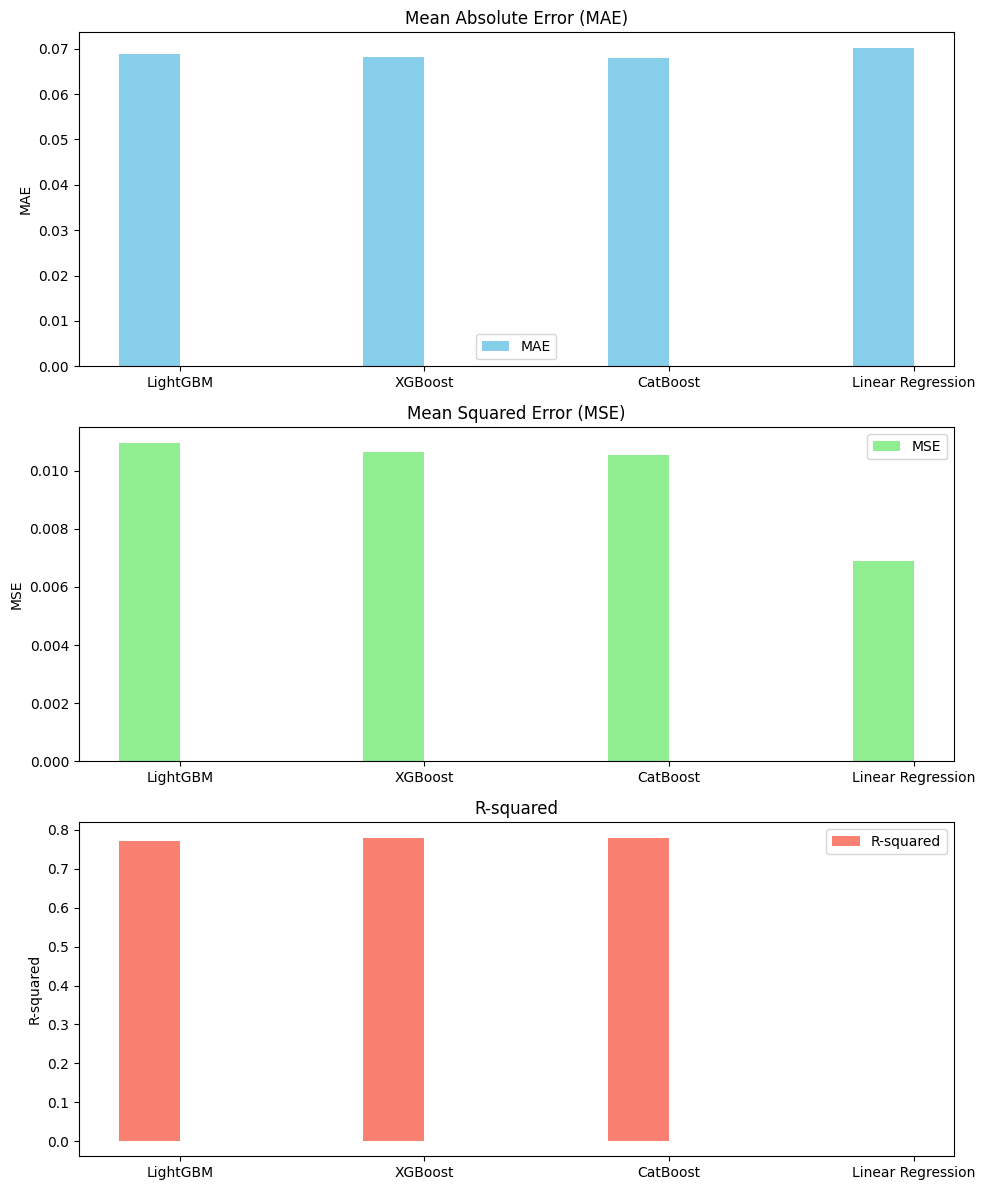

In [3]:
# MAE, MSE, and R-squared values from Linear Regression model
mae_linear = 0.05779745133880876
mse_linear = 0.005292979938494648
r2_linear = 0.22925031450902467

# MAE, MSE, and R-squared values from the ensemble models
mae_values = [mae_lgbm, mae_xgb, mae_catboost, mae_linear]
mse_values = [mse_lgbm, mse_xgb, mse_catboost, mse_linear]
r2_values = [r2_lgbm, r2_xgb, r2_catboost, r2_linear]

# Algorithm names
algorithms = ['LightGBM', 'XGBoost', 'CatBoost', 'Linear Regression']

# Bar width for the plots
bar_width = 0.25

# X positions for each algorithm
index = np.arange(len(algorithms))

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# MAE plot
axs[0].bar(index - bar_width / 2, mae_values, bar_width, color='skyblue')
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylabel('MAE')
axs[0].set_xticks(index)
axs[0].set_xticklabels(algorithms)
axs[0].legend(['MAE'], loc='best')

# MSE plot
axs[1].bar(index - bar_width / 2, mse_values, bar_width, color='lightgreen')
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_ylabel('MSE')
axs[1].set_xticks(index)
axs[1].set_xticklabels(algorithms)
axs[1].legend(['MSE'], loc='best')

# R-squared plot
axs[2].bar(index - bar_width / 2, r2_values, bar_width, color='salmon')
axs[2].set_title('R-squared')
axs[2].set_ylabel('R-squared')
axs[2].set_xticks(index)
axs[2].set_xticklabels(algorithms)
axs[2].legend(['R-squared'], loc='best')

# Show plots
plt.tight_layout()
plt.show()